In [14]:
#!/usr/bin/env python3.7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import timeit
from datetime import date
import seaborn as sns

import statsmodels.api as sm

from scipy import stats
import scipy as scipy

import svgutils.transform as sg
import sys

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_columns', None)  # Give us all the columns without truncation    

In [15]:
def importCSV(filePath):
    dataFrame = pd.read_csv(filePath, header=0, low_memory=False)
    return dataFrame

def reIndex(DF):
    DF.reset_index(drop=True, inplace=True)
    return 0

def nullDrop(DF,col):
    return DF.dropna(subset=col)

def dfDrop(DF,col,inPlace):
    if(inPlace):
        DF.drop(col, inplace=True, axis=1)
        return 0
    else:
        return DF.drop(col,axis=1)

def makeDict(value,key):
    myDict = value
    myDict.index = key
    return myDict.to_dict()

def normaliseDF(DF):
    columns = list(DF) 
    for i in columns:
        DF[i] = DF[i]/DF[i].max()
    return DF

In [16]:
####################################### Dataframes ##########################################################

#paidGames = importCSV('data/processed/paidGames.csv')  #appid  Rating  type  Price  Units_Sold  Total_Revenue  playtime_2weeks playtime_forever  store_time_days
#freeGames = importCSV('data/processed/freeGames.csv') #appid  Rating  type  Price  Units_Sold  Total_Revenue  playtime_2weeks playtime_forever  store_time_days

#paidDLC = importCSV('data/processed/paidDLC.csv') #appid  Rating  type  Price  Units_Sold  Total_Revenue  playtime_2weeks playtime_forever  store_time_days
#freeDLC = importCSV('data/processed/freeDLC.csv') #appid  Rating  type  Price  Units_Sold  Total_Revenue  playtime_2weeks playtime_forever  store_time_days

#paidMods = importCSV('data/processed/paidMods.csv') #appid  Rating  type  Price  Units_Sold  Total_Revenue  playtime_2weeks playtime_forever  store_time_days
#freeMods = importCSV('data/processed/freeMods.csv') #appid  Rating  type  Price  Units_Sold  Total_Revenue  playtime_2weeks playtime_forever  store_time_days

#gameLocPriceCount = importCSV('data/processed/gameLocPriceCount.csv') #Country  Total_Revenue  Revenue_Per_Player
#gameLocPriceCountTop = importCSV('data/processed/gameLocPriceCountTop.csv') # Country  Total_Revenue  Revenue_Per_Player

#playerCountriesCount = importCSV('data/processed/playerCountriesCount.csv') #Country Percentage of Players

socialData = importCSV('data/processed/socialData.csv') #steamid  daysOld  Number_Friends  Number_Groups  Mult_Play_2Week  Mult_Play_All  NonMult_Play_2Week  NonMult_Play_All 

#games.to_csv('data/processed/games.csv',index= False) # steamid, appid, playtime_2weeks, playtime_forever, dateretrieved

#############################################################################################################
#############################################################################################################
#############################################################################################################
#############################################################################################################

In [17]:
socialDataCut = nullDrop(socialData,['daysOld'])
socialDataCut = socialDataCut.div(socialDataCut.daysOld, axis=0)
dfDrop(socialDataCut,['steamid','daysOld'],1)
reIndex(socialDataCut)

socialDataCut = normaliseDF(socialDataCut)


/Users/Mus/Library/Python/3.7/lib/python/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Mus/Library/Python/3.7/lib/python/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


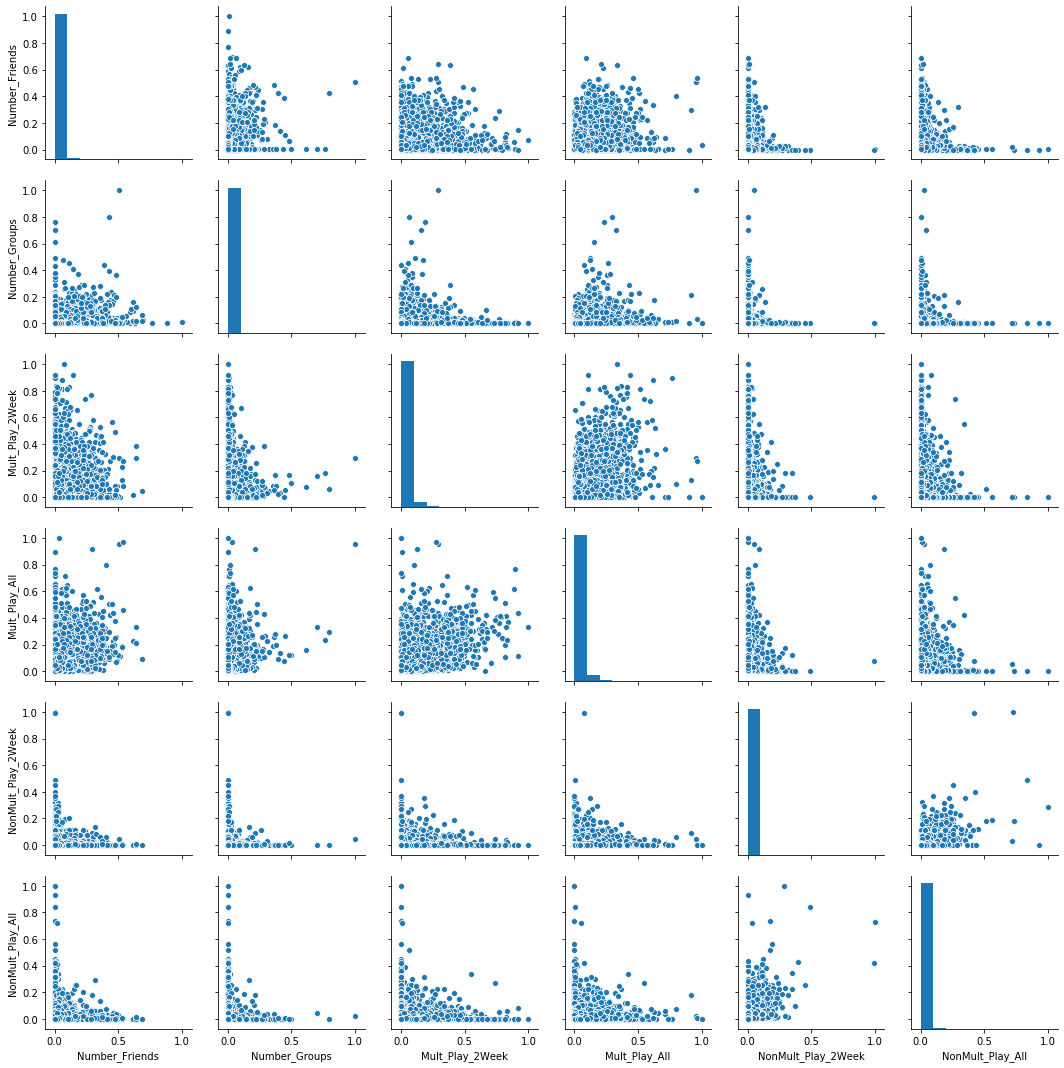

In [18]:
pairPlot = sns.pairplot(socialDataCut)

fig = pairPlot.fig
#fig.savefig('pairPlot.png')



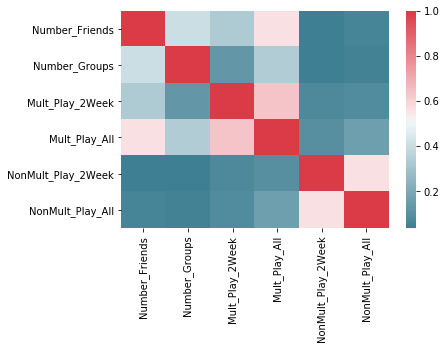

In [19]:
corr = socialDataCut.corr()
heatPlot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

fig = heatPlot.get_figure()
#fig.savefig('heatmap.svg')

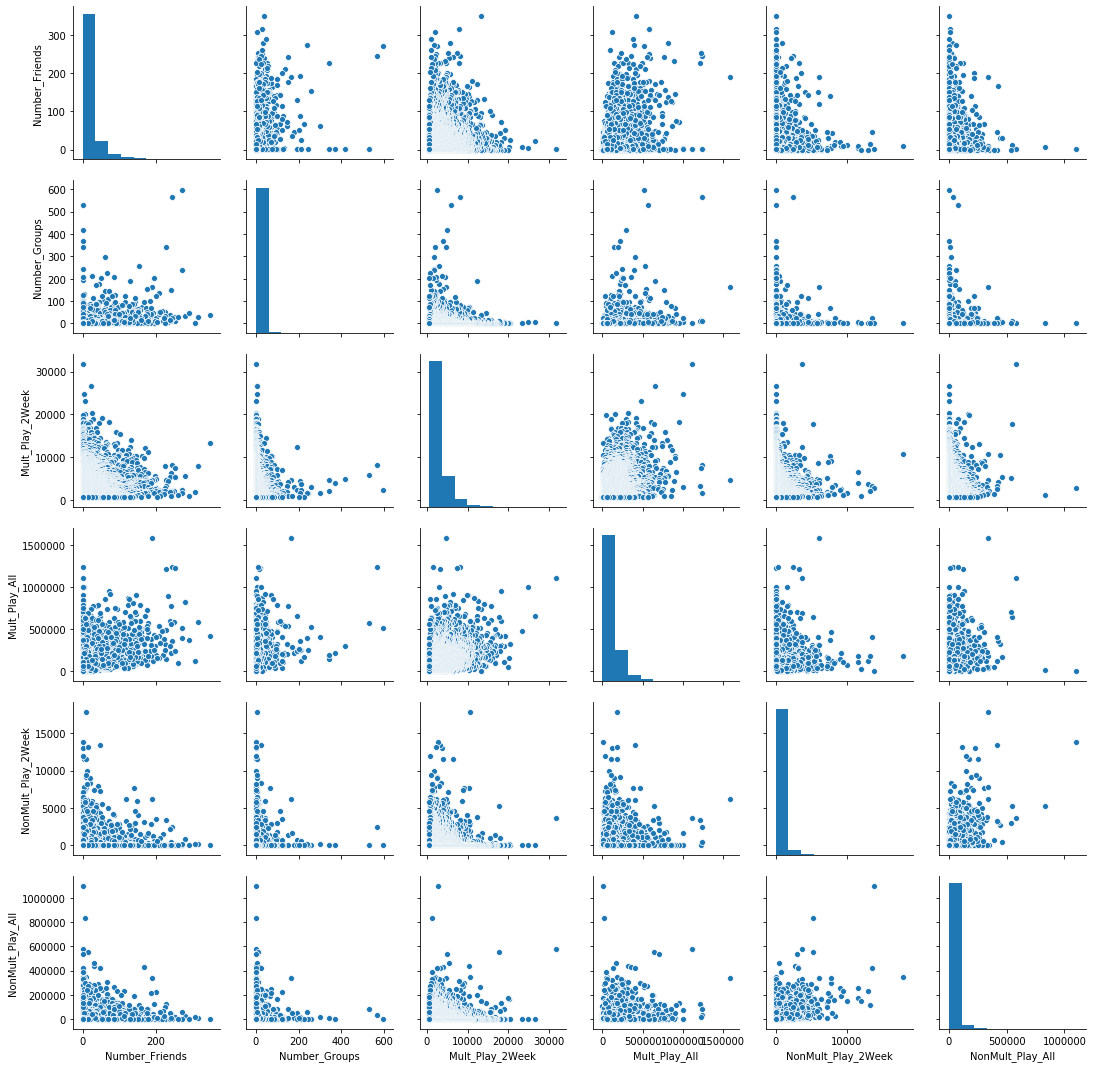

In [25]:
#dfDrop(socialData,['steamid','daysOld'],1)
######## Lets look at the most prolific of gamers 
top20_Mult = socialData.nlargest(round(socialData.shape[0]*0.2), 'Mult_Play_All')
top20_Mult = socialData.nlargest(round(top20_Mult.shape[0]*0.2), 'Mult_Play_2Week')
reIndex(top20_Mult)

pairPlot_top20_Mult = sns.pairplot(top20_Mult)
fig = pairPlot_top20_Mult.fig
fig.savefig('pairPlot_top20_Mult.png')

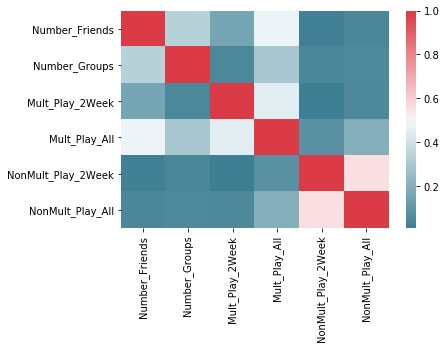

In [26]:
corr = top20_Mult.corr()
heatPlot_top20_Mult = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

fig = heatPlot_top20_Mult.get_figure()
fig.savefig('heatmap_top20_Mult.svg')

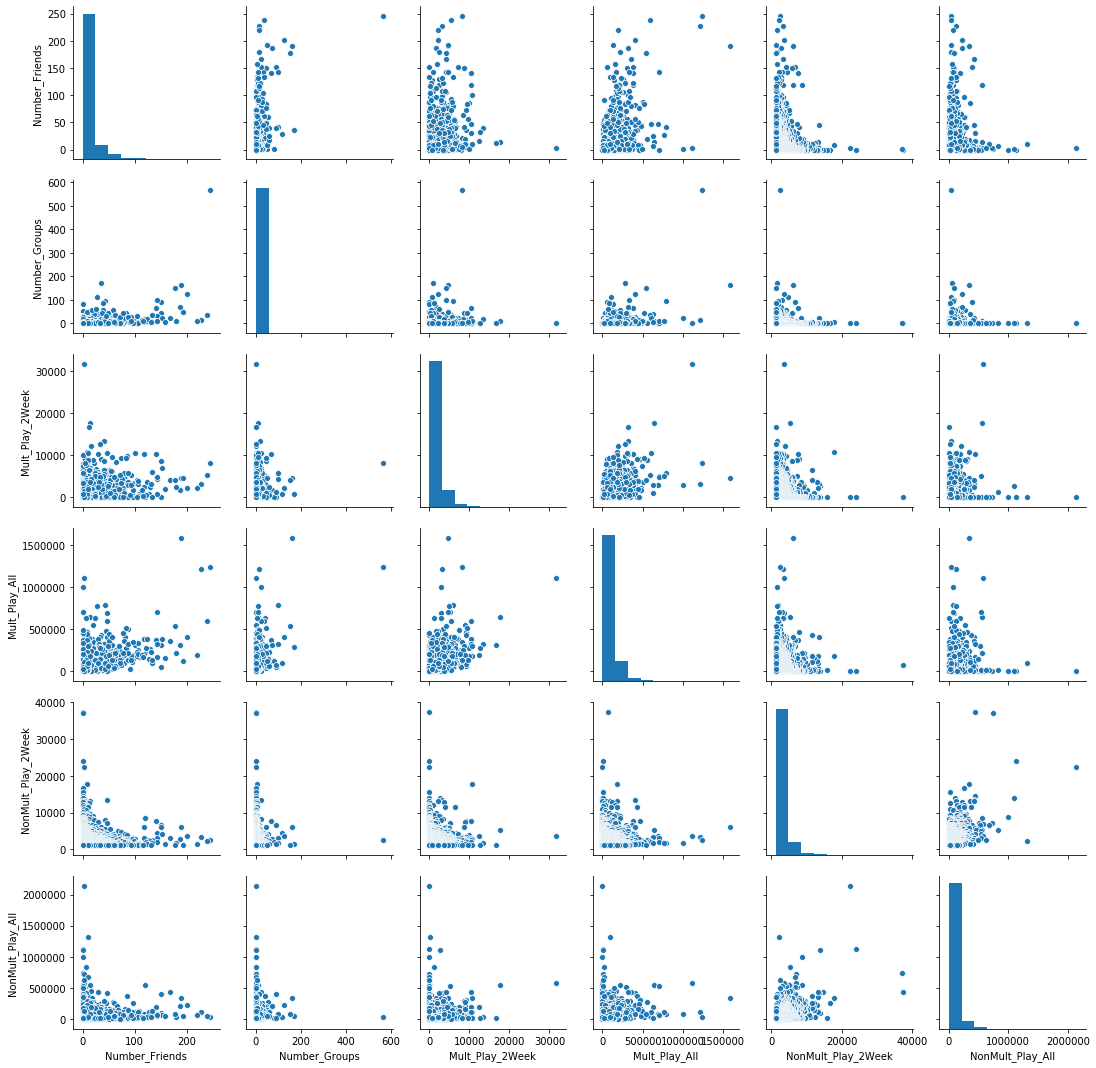

In [27]:
#dfDrop(socialData,['steamid','daysOld'],1)
######## Lets look at the most prolific of gamers 
top20_Single = socialData.nlargest(round(socialData.shape[0]*0.2), 'NonMult_Play_All')
top20_Single = socialData.nlargest(round(top20_Mult.shape[0]*0.2), 'NonMult_Play_2Week')
reIndex(top20_Single)

pairPlot_top20_Single = sns.pairplot(top20_Single)
fig = pairPlot_top20_Single.fig
fig.savefig('pairPlot_top20_Single.png')

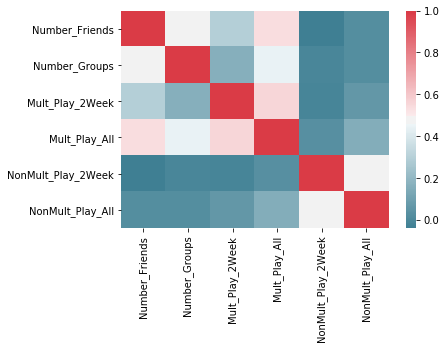

In [28]:
corr = top20_Single.corr()
heatPlot_top20_Single = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

fig = heatPlot_top20_Single.get_figure()
fig.savefig('heatmap_top20_Single.svg')